In [1]:
from losses import binary_crossentropy 
from tensorflow.keras.utils import plot_model
from eunet import build_EUNet
from loading_preprocessing_dataset import prepare_dataset, create_dataset
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

tf.python.client.device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3973255694300626217,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2723228270632701430
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6244966080
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2431350964376570564
 physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5811948311100359713
 physical_device_desc: "device: XLA_GPU device"]

## 1. Build Efficient U-Net 

In [3]:
model = build_EUNet(number_classes = 1, input_height = 256, input_width = 256)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 13) 364         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128, 128, 16) 0           conv2d[0][0]                     
                                                                 max_pooling2d[0][0]          

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0079915 to fit



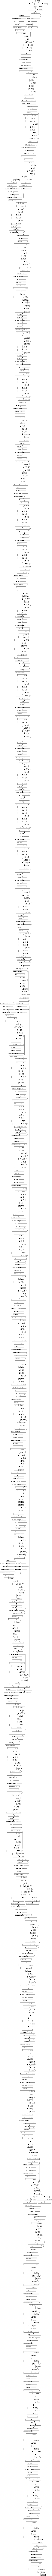

In [7]:
plot_model( model,
            to_file='model.png',
            show_shapes=True,
            show_layer_names=True,
            dpi=4048)

In [8]:
model.compile("adam", loss=binary_crossentropy)

## 2. Load and Prepare Train, Validation and Test Datasets

In [9]:
Train_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/"
Valid_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/"
Test_Dataset_dir = "/media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/"

In [10]:
train_sb_dir, train_gt_dir, sb_train_list, gt_train_list = prepare_dataset(Train_Dataset_dir) #load Satellite und Ground Truths Data
valid_sb_dir, valid_gt_dir, sb_valid_list, gt_valid_list = prepare_dataset(Valid_Dataset_dir)
test_sb_dir, test_gt_dir, sb_test_list, gt_test_list = prepare_dataset(Test_Dataset_dir)

Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/Croped_SB/
Number of  ground truths: 6876

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/train/Croped_GT/
Number der satellien images: 6876
*********************************************
Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/Croped_SB/
Number of  ground truths: 756

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/valid/Croped_GT/
Number der satellien images: 756
*********************************************
Satellite Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/Croped_SB/
Number of  ground truths: 774

Ground Truths Directory: /media/rima/C/Datasets/cut_tirol/Klein_Dataset2/test/Croped_GT/
Number der satellien images: 774
*********************************************


In [11]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
number_batches = 4 #
buffer_size =  20000

In [12]:
train_dataset = create_dataset(sb_train_list, gt_train_list, buffer_size =  buffer_size, number_batche = number_batches )
validation_dataset = create_dataset(sb_valid_list, gt_valid_list, buffer_size =  buffer_size, number_batche = number_batches )
test_dataset = create_dataset(sb_test_list, gt_test_list, buffer_size =  buffer_size, number_batche = number_batches )

(4, 256, 256, 3) (4, 256, 256, 1)


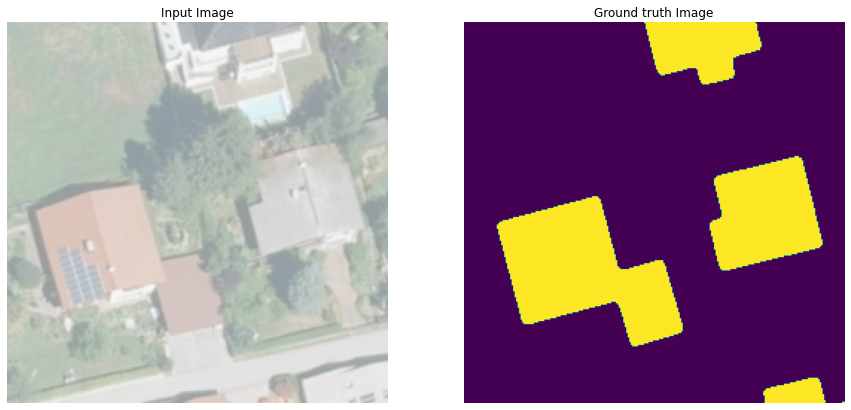

In [14]:
for SB, GT in validation_dataset.take(1):
    plt.figure(figsize=(15,15))
    print(SB.shape, GT.shape)
    display_list=[SB[0,:,:,:,],GT[0,:,:,:,]]
    title = ['Input Image', 'Ground truth Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i]*.5+.5 )
        plt.axis('off')
    plt.show()

## 3. Train Model

In [ ]:
model.fit(train_dataset,
          epochs= 20,
          verbose=1,
          callbacks=None,
          validation_data= validation_dataset,)

Epoch 1/20
1719/1719 [==============================] - 176s 102ms/step - loss: 2.4587 - val_loss: 0.7114
Epoch 2/20
1719/1719 [==============================] - 177s 103ms/step - loss: 0.6282 - val_loss: 0.4821
Epoch 3/20
1719/1719 [==============================] - 175s 102ms/step - loss: 0.5262 - val_loss: 0.4129
Epoch 4/20
1719/1719 [==============================] - 178s 104ms/step - loss: 0.5023 - val_loss: 0.4191
Epoch 5/20
 961/1719 [===============>..............] - ETA: 1:19 - loss: 0.4985

## 4. Test Model

(4, 256, 256, 3) (4, 256, 256, 1)


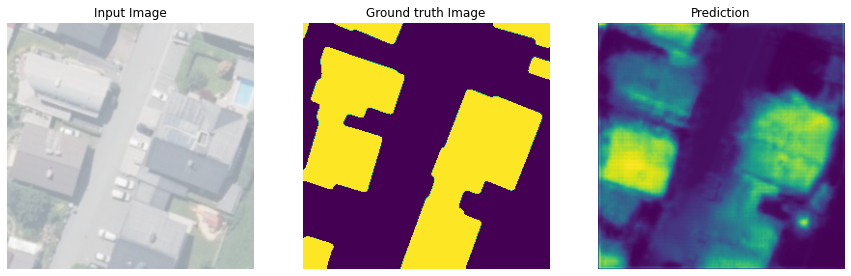

(4, 256, 256, 3) (4, 256, 256, 1)


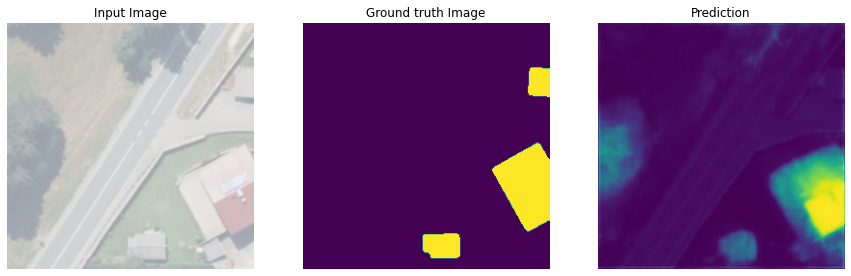

(4, 256, 256, 3) (4, 256, 256, 1)


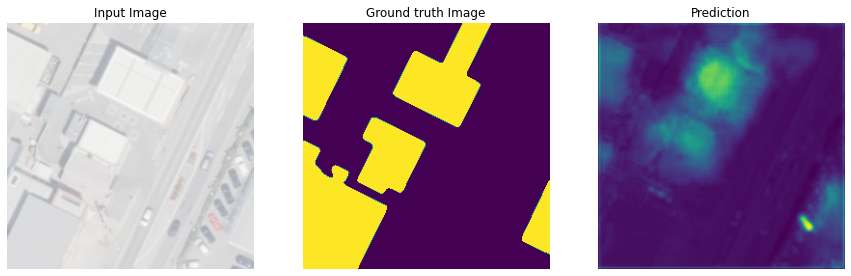

(4, 256, 256, 3) (4, 256, 256, 1)


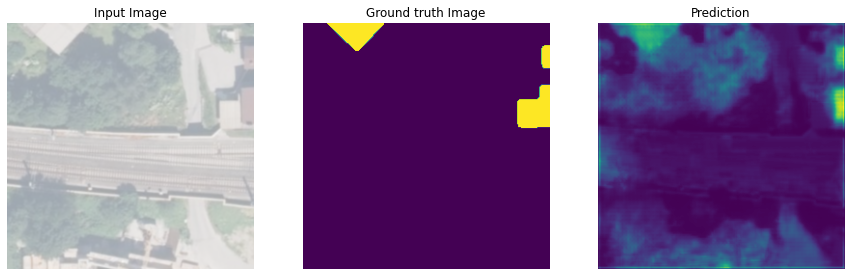

(4, 256, 256, 3) (4, 256, 256, 1)


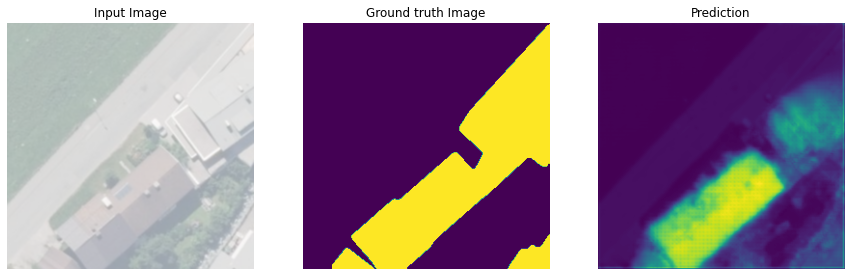

(4, 256, 256, 3) (4, 256, 256, 1)


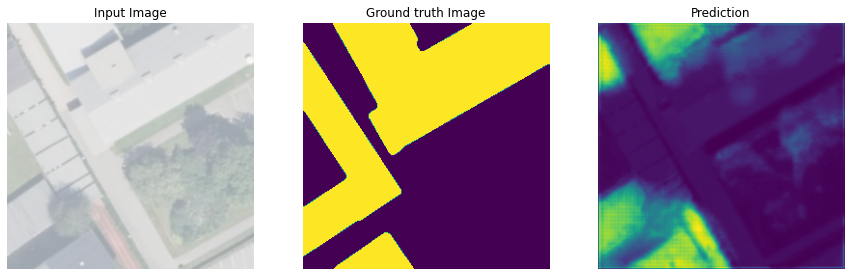

(4, 256, 256, 3) (4, 256, 256, 1)


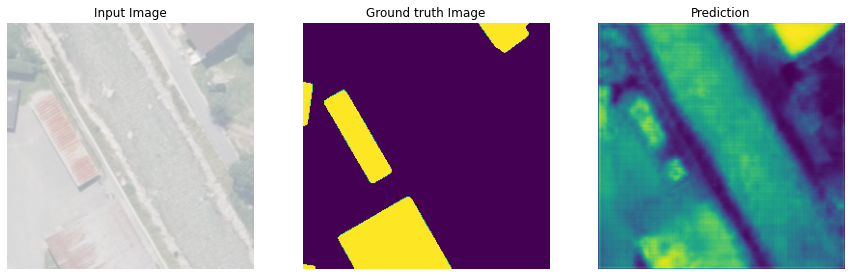

(4, 256, 256, 3) (4, 256, 256, 1)


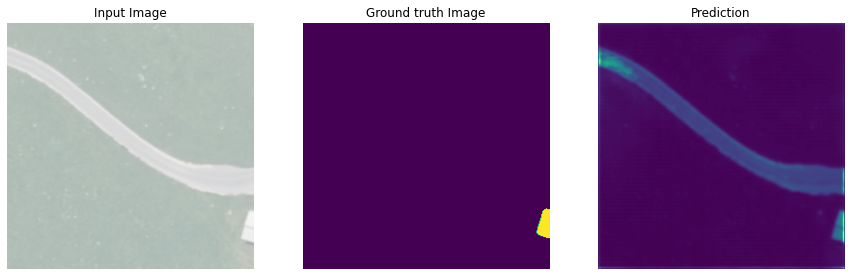

(4, 256, 256, 3) (4, 256, 256, 1)


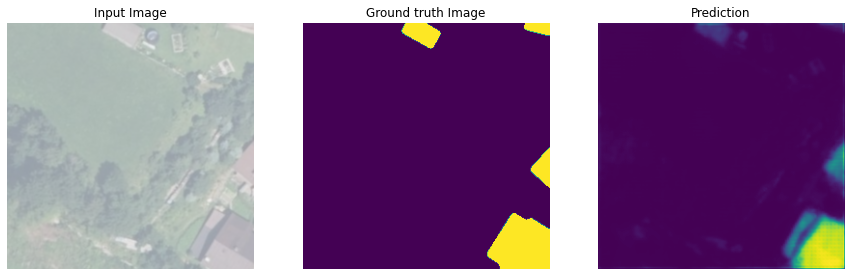

(4, 256, 256, 3) (4, 256, 256, 1)


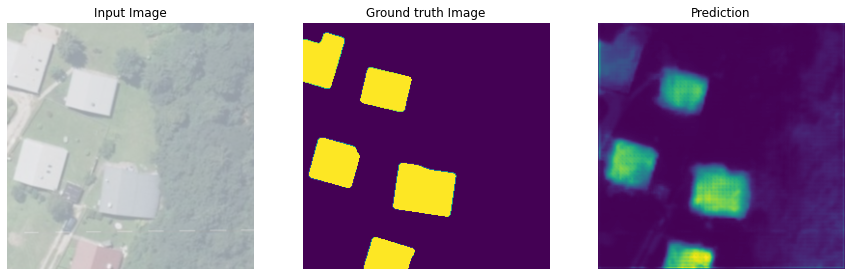

(4, 256, 256, 3) (4, 256, 256, 1)


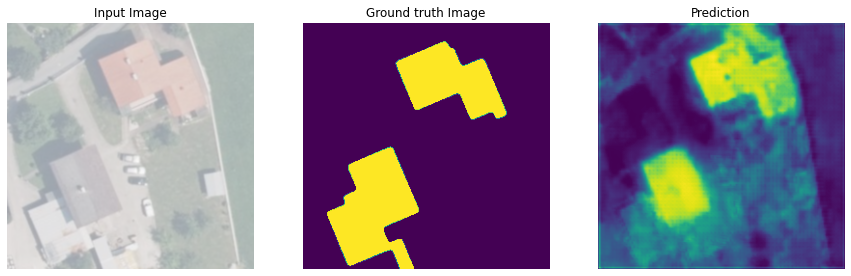

(4, 256, 256, 3) (4, 256, 256, 1)


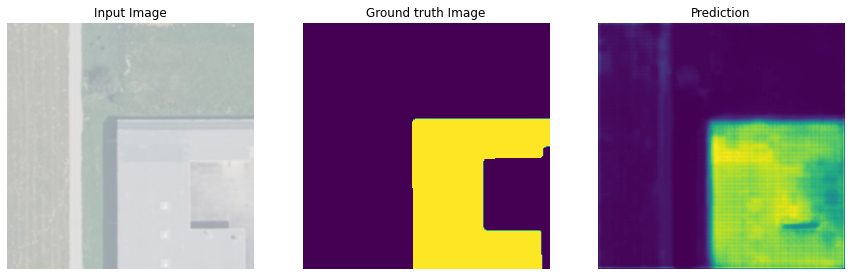

(4, 256, 256, 3) (4, 256, 256, 1)


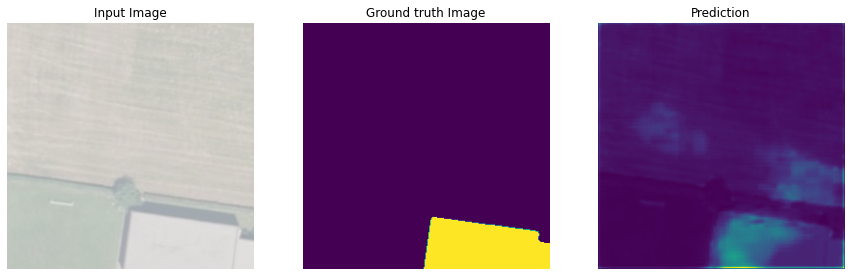

(4, 256, 256, 3) (4, 256, 256, 1)


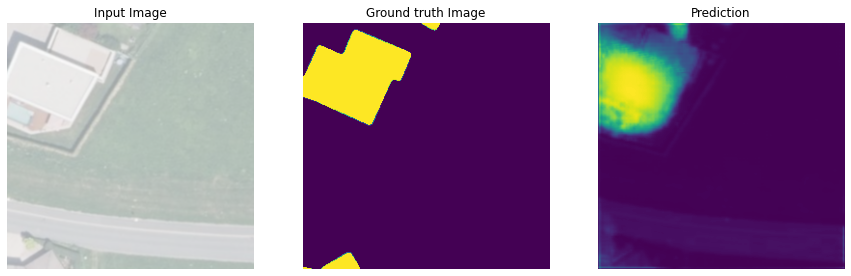

(4, 256, 256, 3) (4, 256, 256, 1)


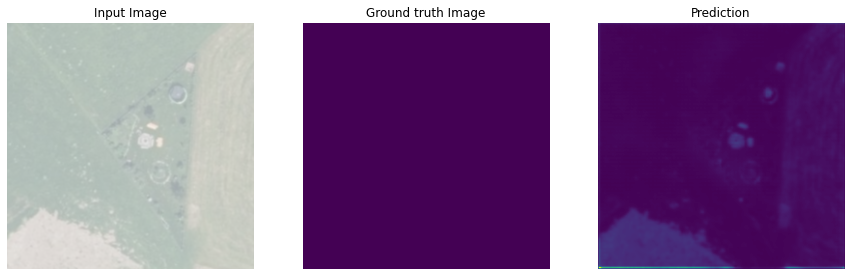

(4, 256, 256, 3) (4, 256, 256, 1)


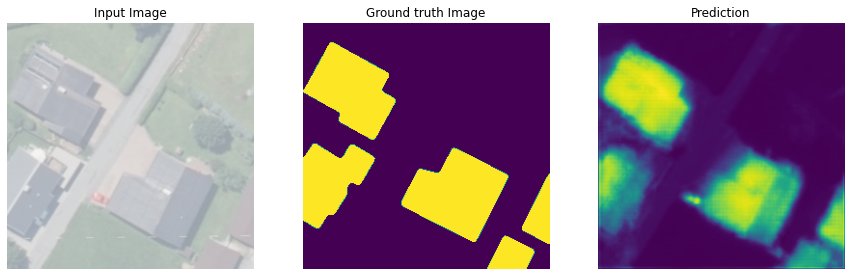

(4, 256, 256, 3) (4, 256, 256, 1)


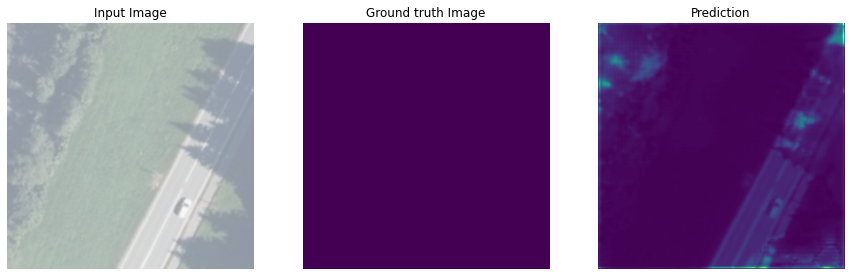

(4, 256, 256, 3) (4, 256, 256, 1)


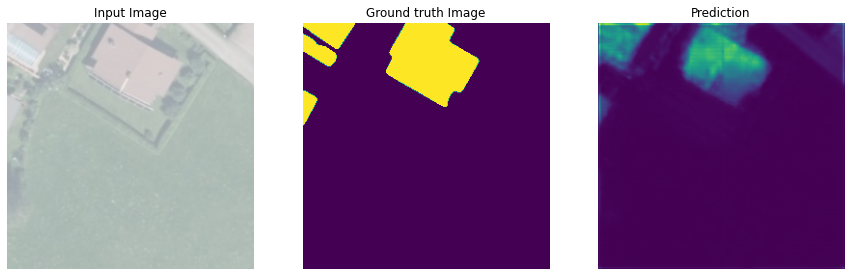

(4, 256, 256, 3) (4, 256, 256, 1)


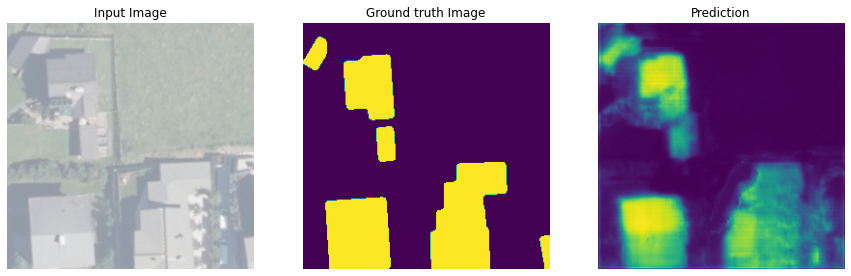

(4, 256, 256, 3) (4, 256, 256, 1)


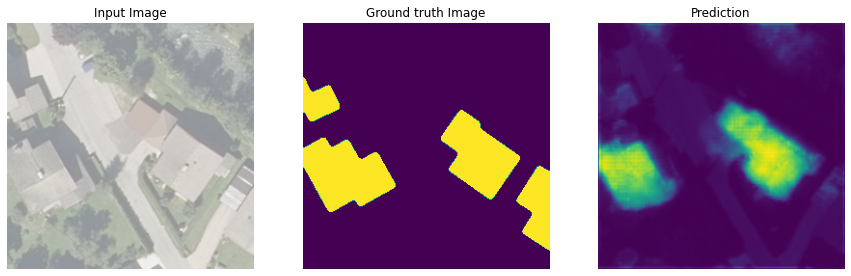

(4, 256, 256, 3) (4, 256, 256, 1)


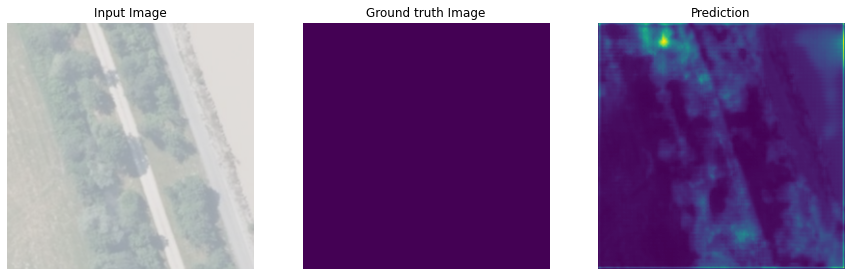

(4, 256, 256, 3) (4, 256, 256, 1)


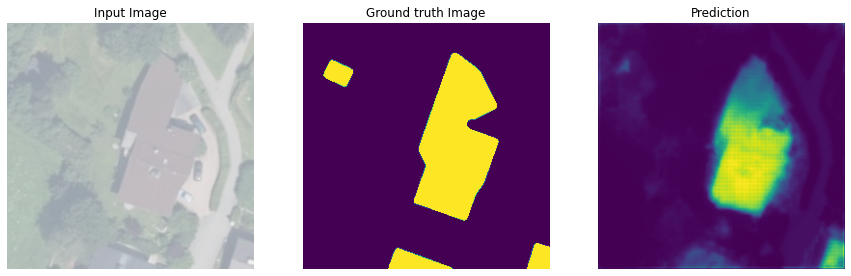

(4, 256, 256, 3) (4, 256, 256, 1)


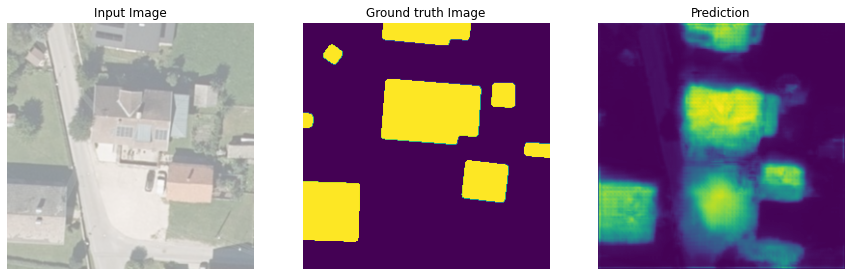

(4, 256, 256, 3) (4, 256, 256, 1)


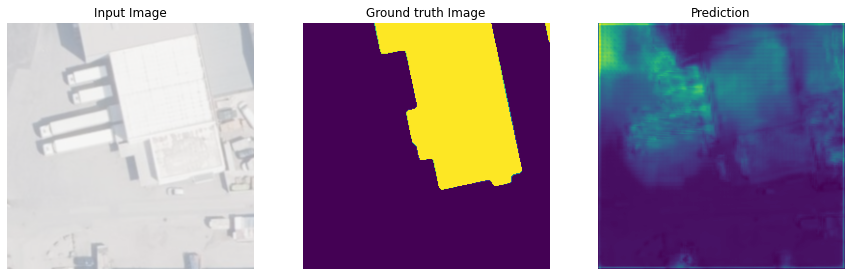

(4, 256, 256, 3) (4, 256, 256, 1)


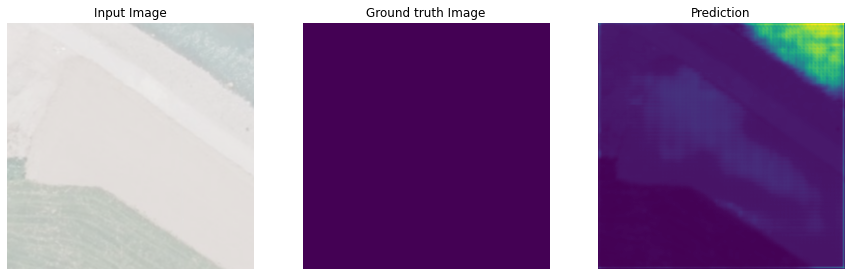

(4, 256, 256, 3) (4, 256, 256, 1)


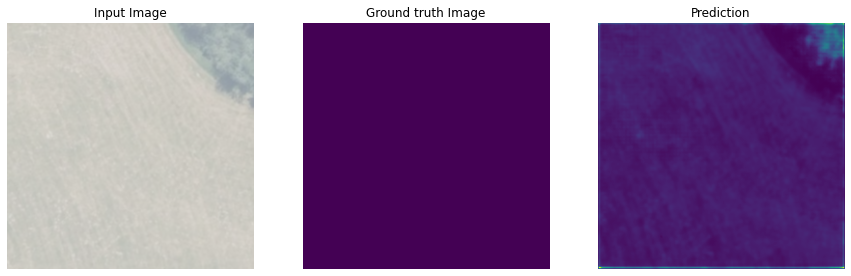

(4, 256, 256, 3) (4, 256, 256, 1)


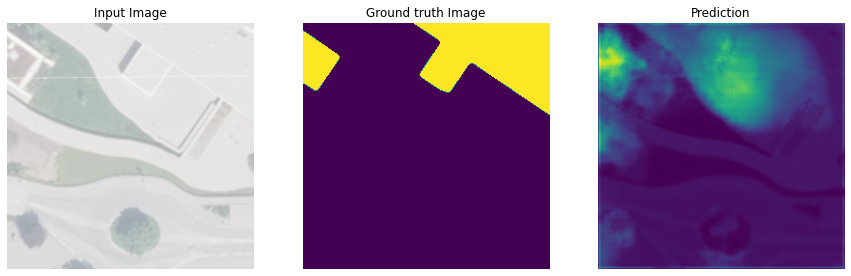

(4, 256, 256, 3) (4, 256, 256, 1)


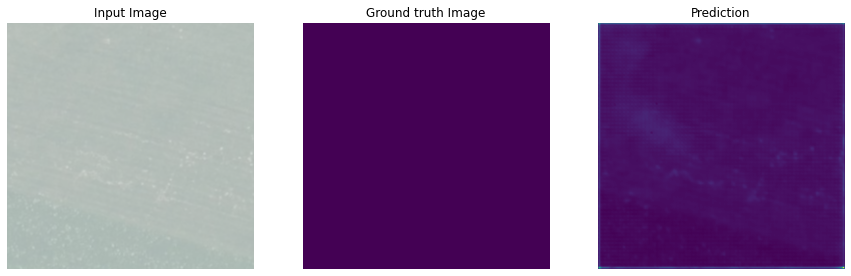

(4, 256, 256, 3) (4, 256, 256, 1)


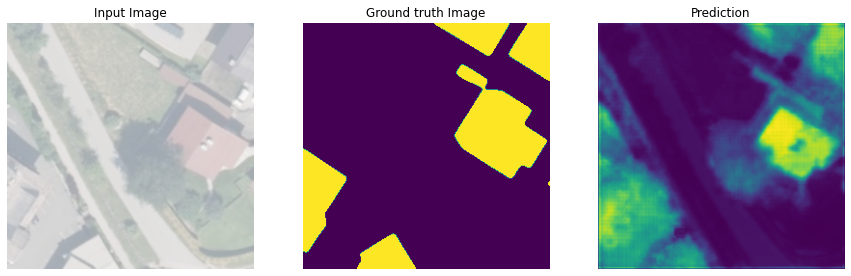

(4, 256, 256, 3) (4, 256, 256, 1)


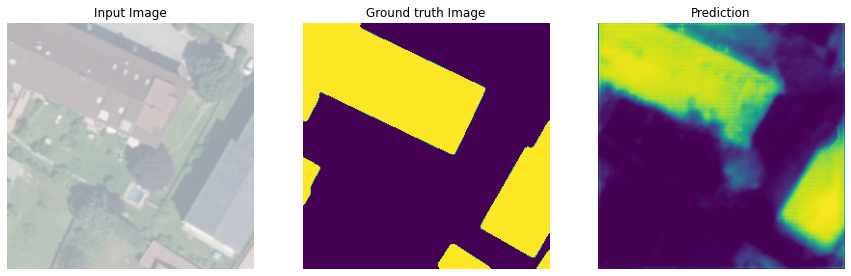

In [15]:
for SB, GT in test_dataset.take(30):
    b = model.predict(SB)
    plt.figure(figsize=(15,15))
    print(SB.shape, GT.shape)
    display_list=[SB[0,:,:,:,],GT[0,:,:,:,],b[0,:,:,:,]]
    title = ['Input Image', 'Ground truth Image',"Prediction"]
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i]*.5+.5 )
        plt.axis('off')
    plt.show()